<center><h1>Homework Assignment #2</h1></center>
<table width="100%">
    <tr>
        <td><img src="../images/img0.jpg" /></td>
    </tr>
</table>

In [1]:
# Preamble
library("ggplot2", quietly = TRUE)
library("dplyr", quietly = TRUE)


Vedhæfter pakke: ‘dplyr’


De følgende objekter er maskerede fra ‘package:stats’:

    filter, lag


De følgende objekter er maskerede fra ‘package:base’:

    intersect, setdiff, setequal, union




1. The following code uses dplyr to generate some summary statistics about each class of car. Use the data to recreate this plot:

```R
library("ggplot2")
library("dplyr")
class <- mpg %>% 
  group_by(class) %>% 
  summarise(n = n(), hwy = mean(hwy))
head(class)
```

<table width="60%" align="centre">
    <tr>
        <td><img src="../images/img100.png" /></td>
    </tr>
</table>

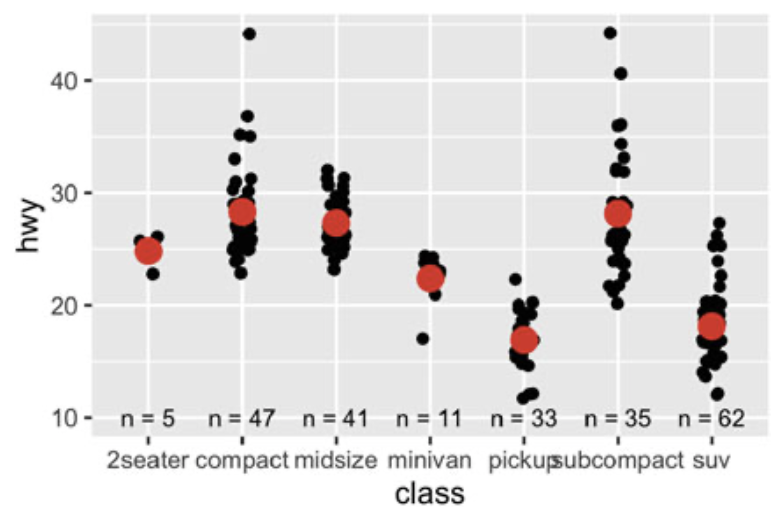

In [2]:
# Stats: number and mean for each class
class <- mpg %>% 
  group_by(class) %>% 
  summarise(n = n(), hwy = mean(hwy))

# Print head
print(class)

# A tibble: 7 × 3
  class          n   hwy
  <chr>      <int> <dbl>
1 2seater        5  24.8
2 compact       47  28.3
3 midsize       41  27.3
4 minivan       11  22.4
5 pickup        33  16.9
6 subcompact    35  28.1
7 suv           62  18.1


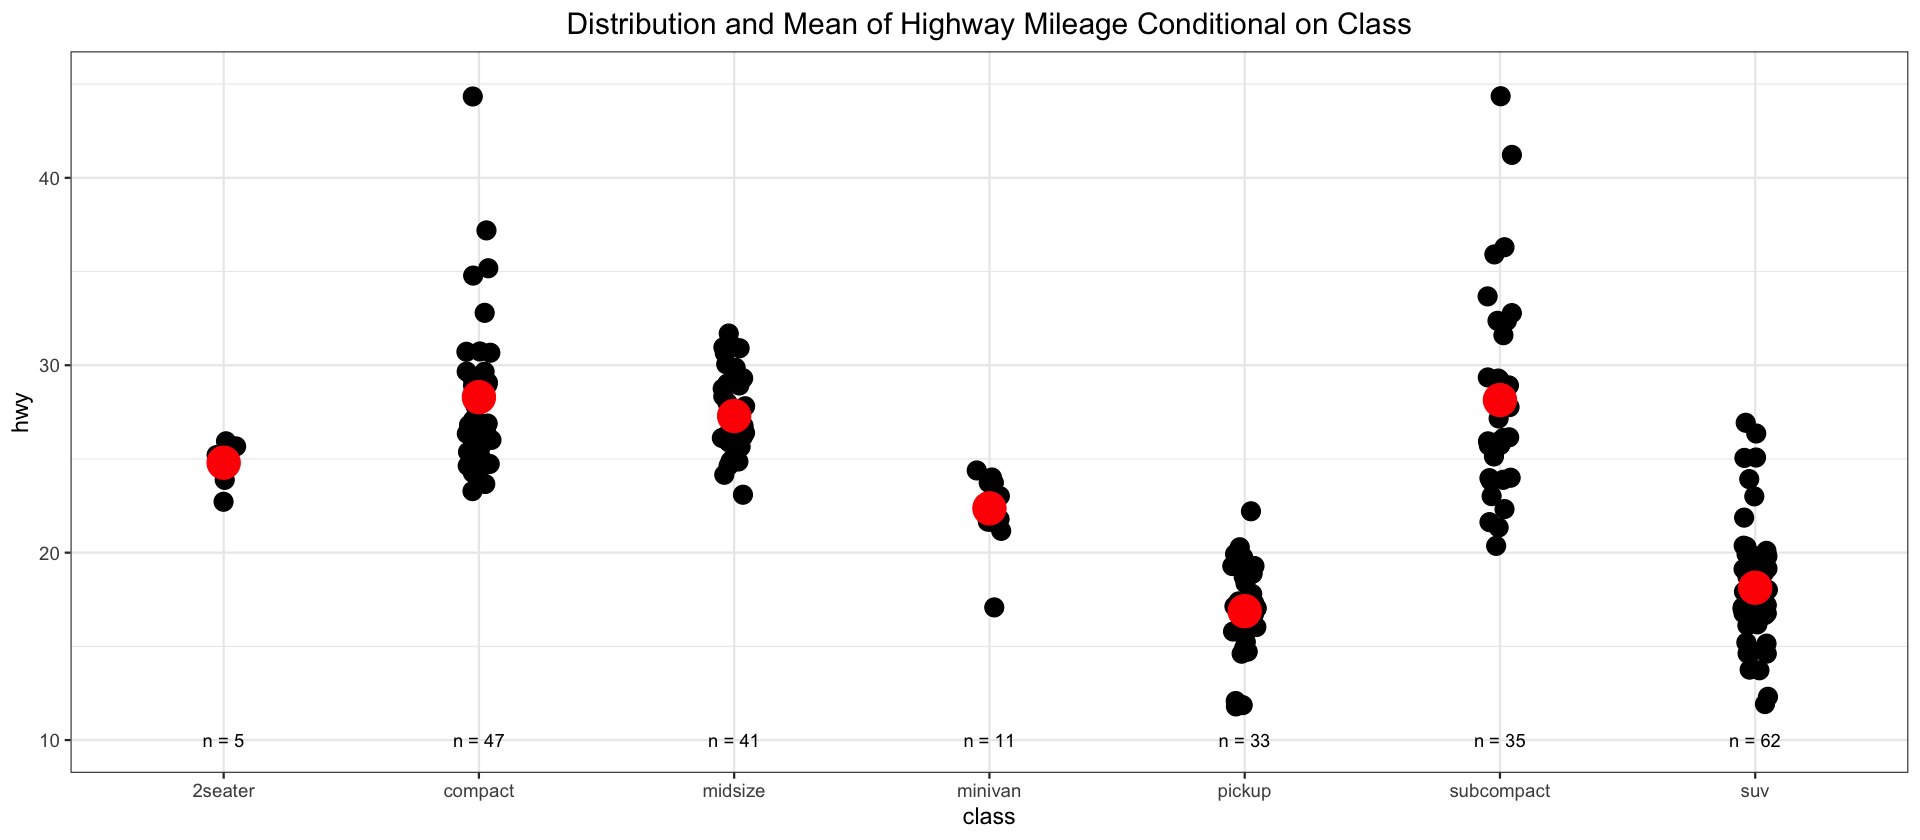

In [12]:
# Set global options
options(repr.plot.width=16, repr.plot.height=7)
global_size = 14

# Create plot
ggplot(class, aes(x = class, y = hwy)) +
geom_point(data = mpg, size = 5, position=position_jitter(width = 0.05, height = NULL)) + 
geom_point(colour = "red", size = 9) +
ylim(10, 45) + 
theme_bw(base_size = global_size) + 
theme(plot.title = element_text(size = 18, hjust = 0.5)) +
geom_text(aes(label = paste("n =", n), y = -Inf), vjust = -2, position = position_dodge(width = .8)) +
ggtitle("Distribution and Mean of Highway Mileage Conditional on Class")

2. What does the following code do? Does it work? Does it make sense? Why/why not?

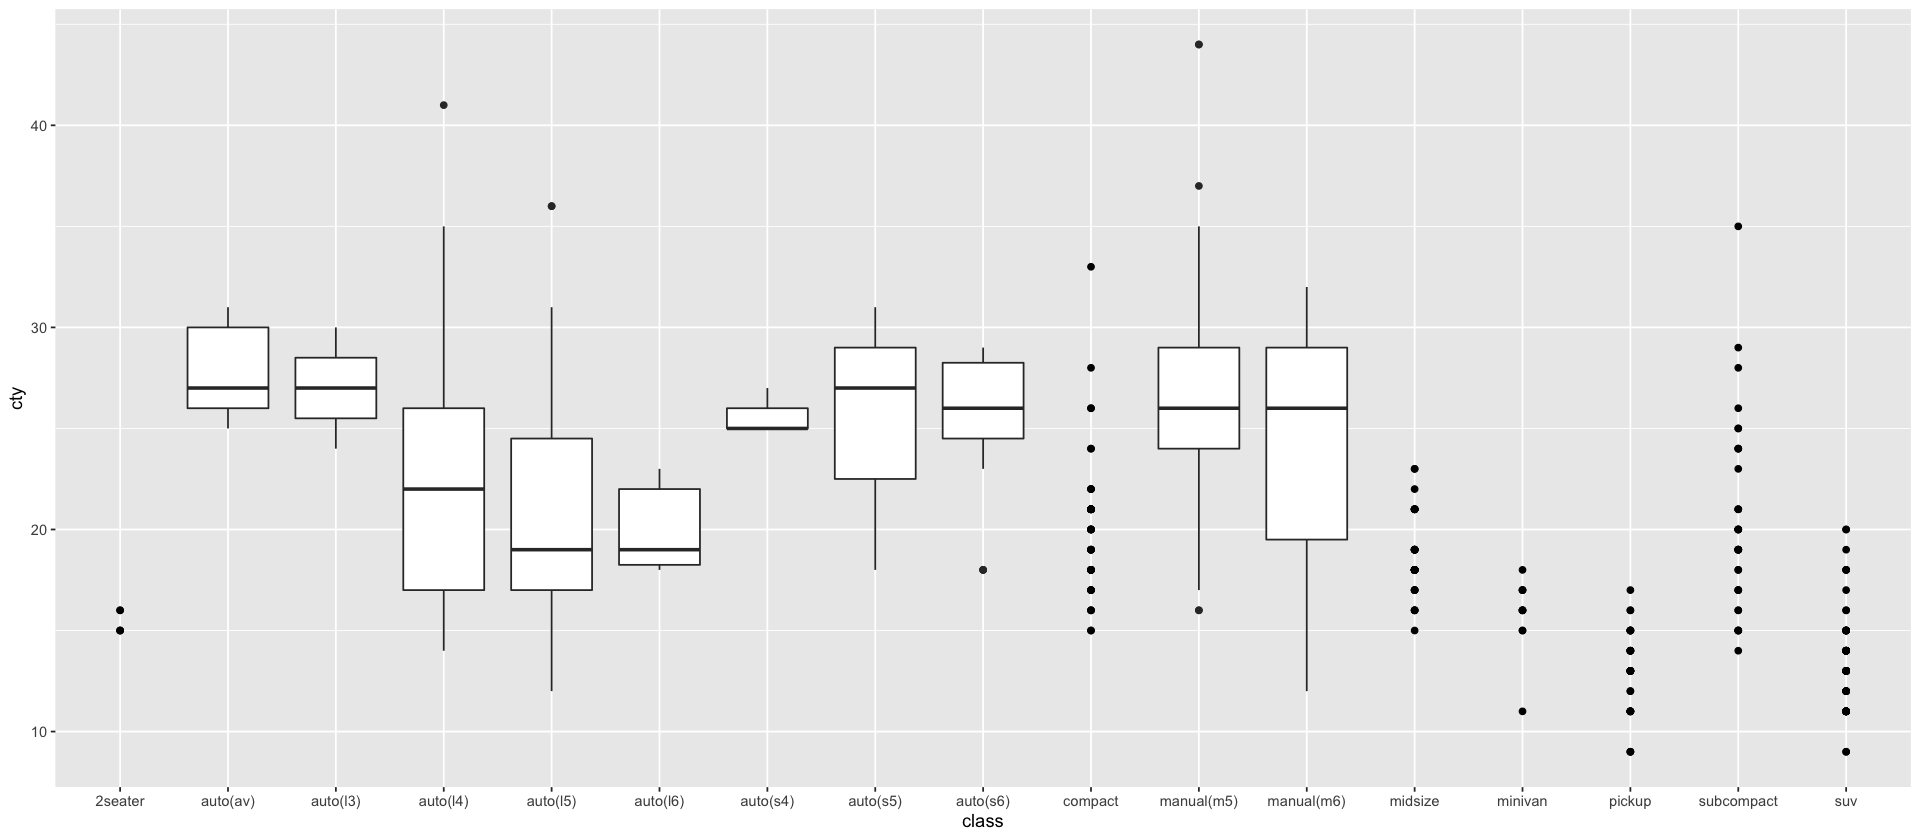

In [30]:
options(repr.plot.width=16, repr.plot.height=7)

ggplot(mpg) + 
#geom_point(aes(class, cty)) 
geom_point(aes(x = class, y = cty)) + 
geom_boxplot(aes(x = trans, y = hwy))

The code creates a combined plot with: $(i)$ a scatterplot showing the city miles per gallon (`cty`) for each `class` of vehicle, $(ii)$ the highway miles per gallon (`hwy`) for each type of transmission (`trans`). The code works. The appropriateness of the plot, however, is debatable because:
1. The vertical axis shown is `cty` but the boxplot's secondary axis is `hwy`. It would have been more appropriate to add a secondary $y$-axis on the right side of the plot.
2. The categories shown are mixed between the boxplot and the scatter plot. It would be better to first have the boxplots (on the left) and then the scatter plots (on the right).

# 3. What’s gone wrong with this plot? How could you fix it?

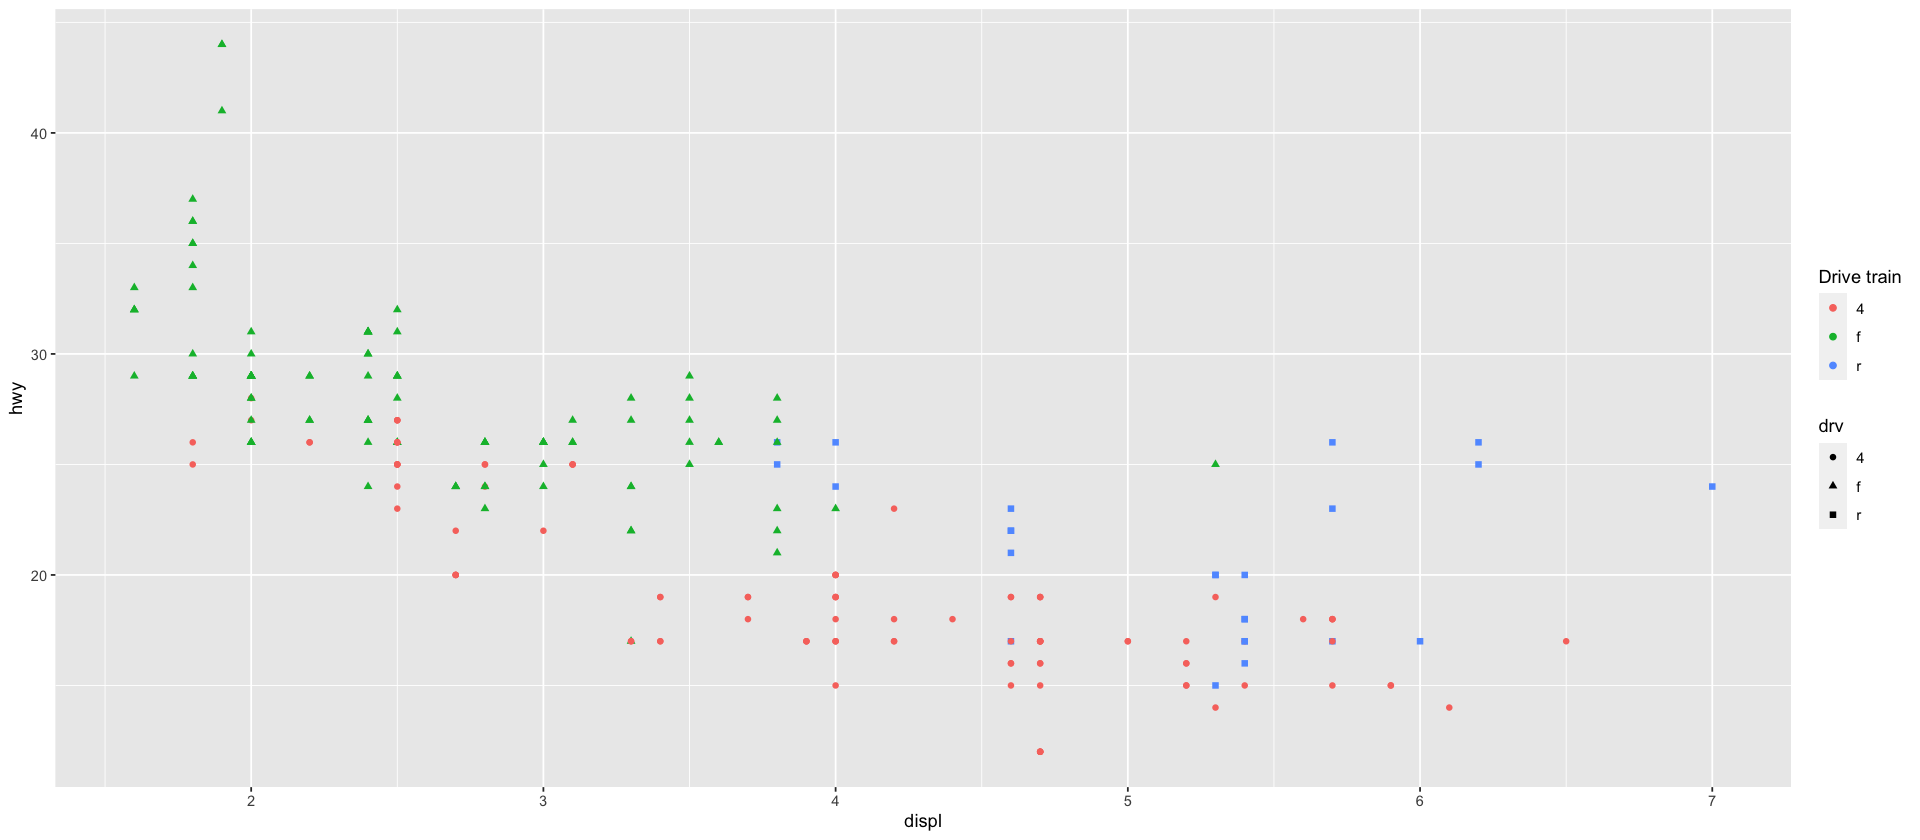

In [99]:
options(repr.plot.width=16, repr.plot.height=7)

ggplot(mpg, aes(displ, hwy)) + 
geom_point(aes(colour = drv, shape = drv)) + 
scale_colour_discrete("Drive train")

The problem with the plot above is that the colors and shapes of each drive type (`drv`) each have its own legend, which is not appropriate (it is not the best for readability). In order to combine the two we need to specify the same `labels` argument in the `scale_colour_manual(...)` and `scale_shape_manual(...)` options. For the shapes we have to choose 16 (filled circle), 17 (filled triangle) and 15 (filled square). I have also added some minor cosmetical tweaks such as another theme, larger text size and symbol size.

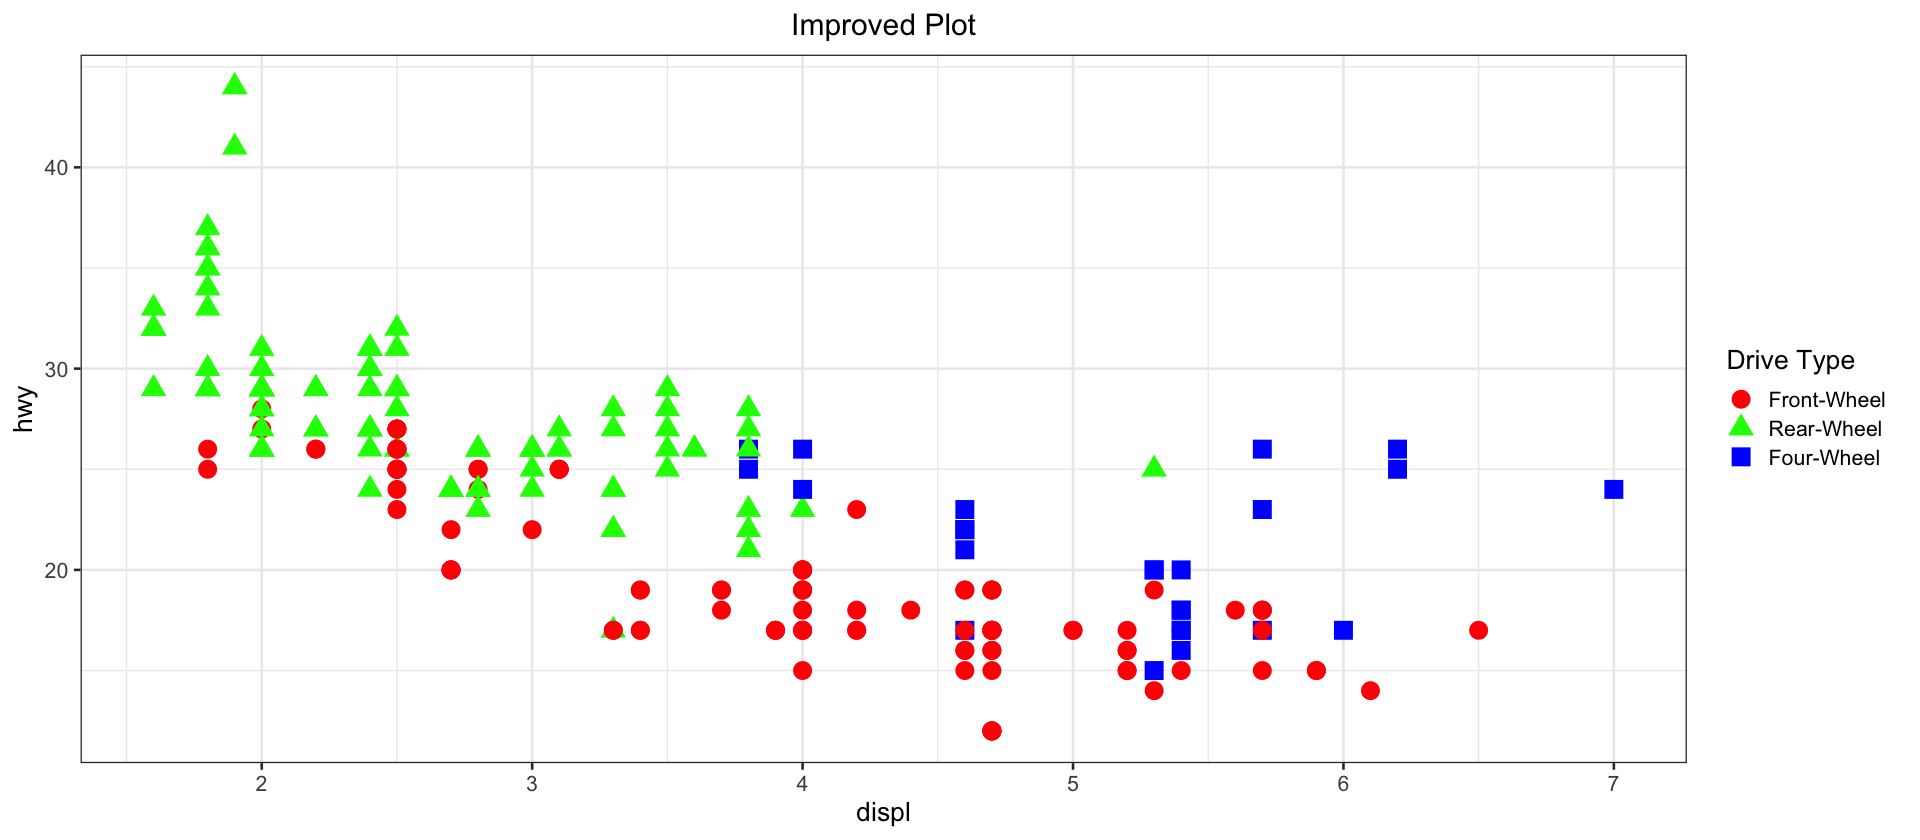

In [48]:
options(repr.plot.width=16, repr.plot.height=7)
global_size = 16

ggplot(mpg, aes(displ, hwy)) + 
geom_point(aes(colour = drv, shape = drv), size = 5) + 
scale_colour_manual(name = "Drive Type",
                      labels = c("Front-Wheel", "Rear-Wheel", "Four-Wheel"),
                      values = c("red", "green", "blue")) +   
scale_shape_manual(name = "Drive Type",
                     labels = c("Front-Wheel", "Rear-Wheel", "Four-Wheel"),
                     values = c(16, 17, 15)) +
theme_bw(base_size = global_size) + 
theme(plot.title = element_text(size = 18, hjust = 0.5)) +
ggtitle("Improved Plot")

# 4. Diamonds

### A. Displaying the Distribution of Price Conditional on Cut and Carat

One possibility is to do a scatter plot with different colors. The result is not particularly intuitive or eye-pleasing. Facetting is a better option as explored in B.

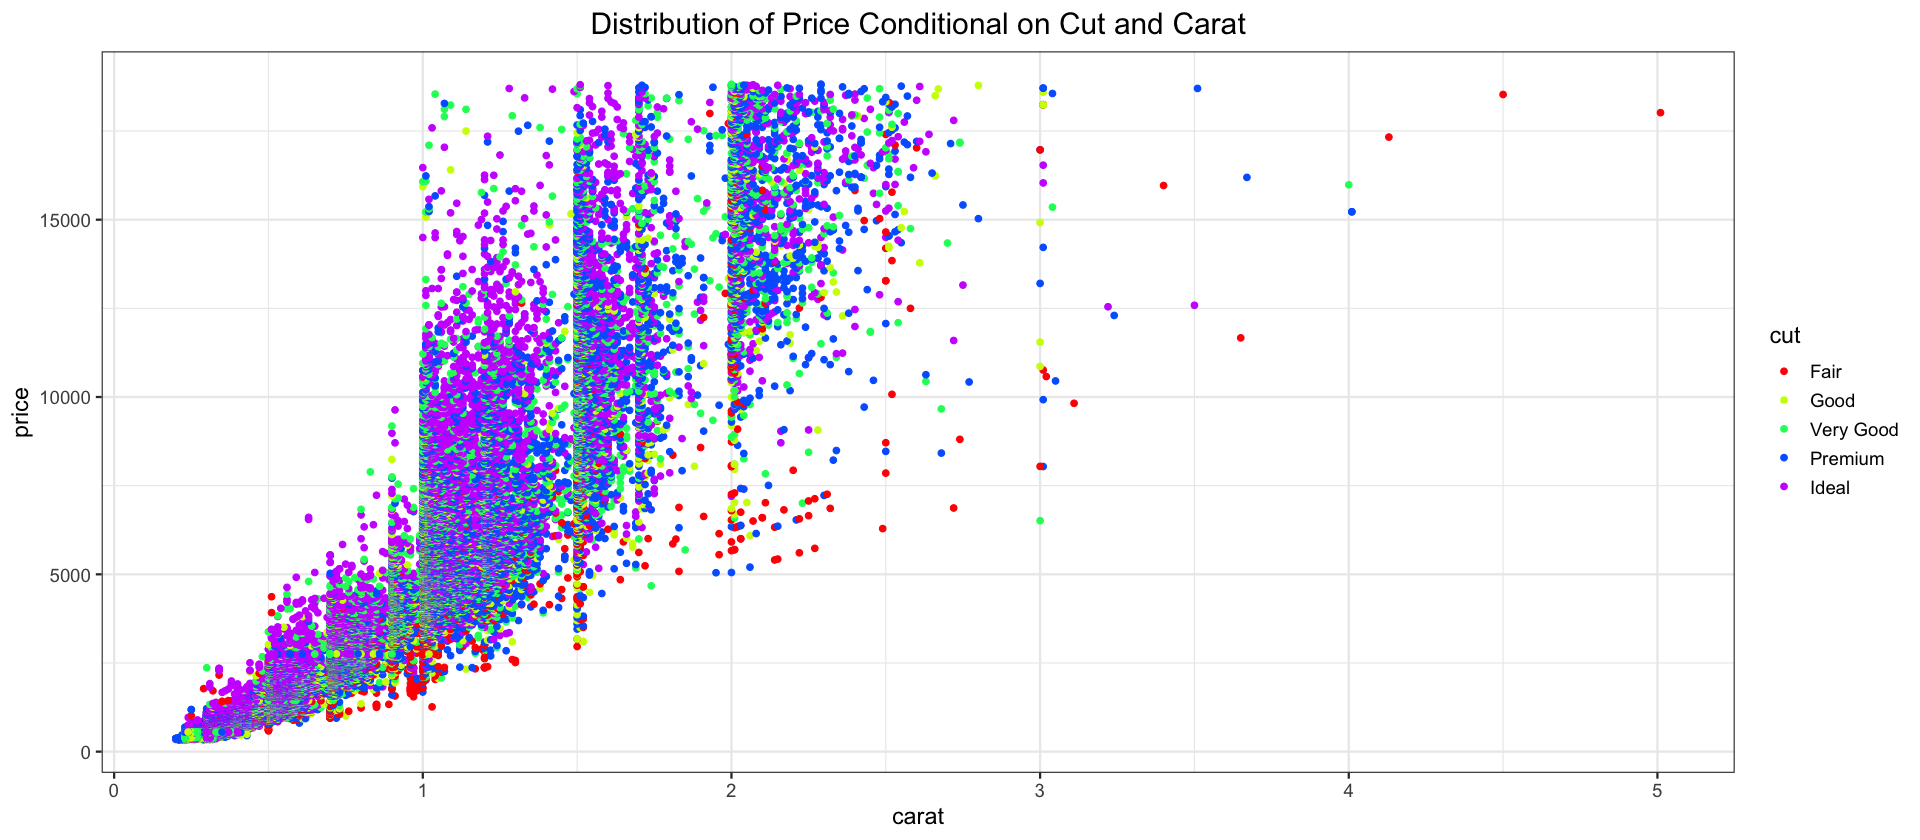

In [135]:
ggplot(diamonds, aes(x = carat, y = price, group = cut, color = cut)) + 
    geom_point() + 
    theme_bw(base_size = global_size) + 
    theme(plot.title = element_text(size = 18, hjust = 0.5)) +
    ggtitle("Distribution of Price Conditional on Cut and Carat") +
    #scale_colour_manual(values = heat.colors(5)) 
    #scale_colour_manual(values = terrain.colors(5)) 
    #scale_colour_manual(values = topo.colors(5)) 
    #scale_colour_manual(values = cm.colors(5)) 
    scale_colour_manual(values = rainbow(5)) 

### B. Facetting by Cut and Grouping by Carat

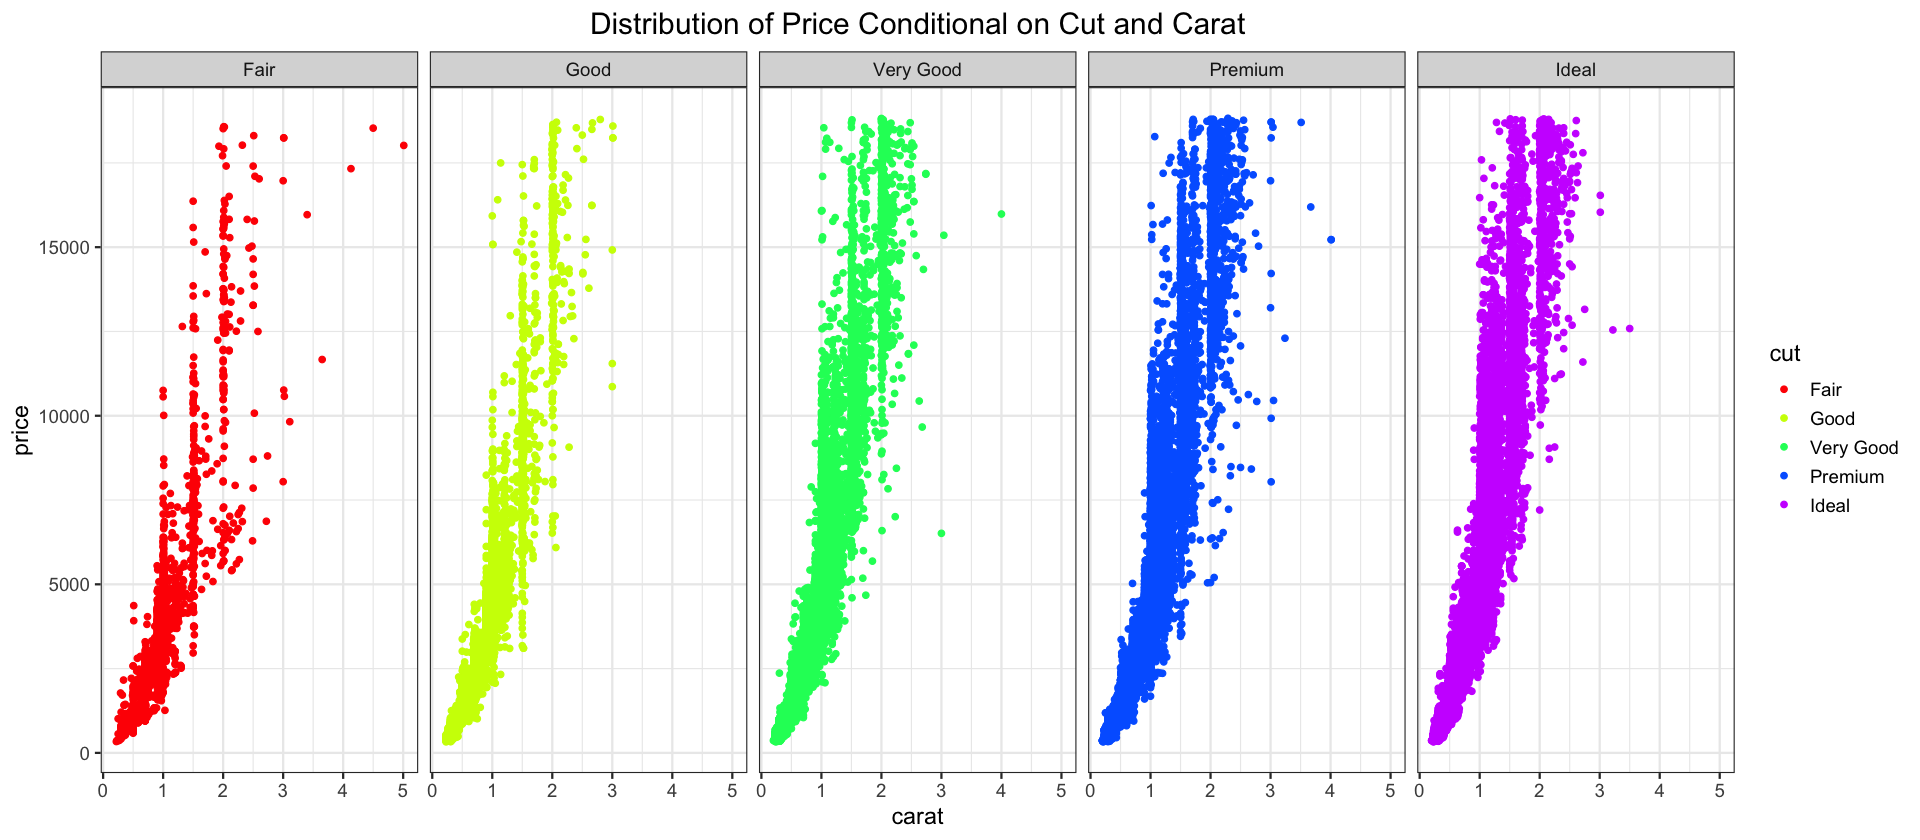

In [134]:
# Set global options
options(repr.plot.width=16, repr.plot.height=7)
global_size = 14

# Create plot
qplot(x = carat, y = price, data = diamonds, colour = cut) + 
    facet_wrap( ~ cut, nrow = 1) + 
    #scale_color_manual(values = wes_palette(n = 5, "Rushmore")) + 
    scale_colour_manual(values = rainbow(5)) +
    theme_bw(base_size = global_size) + 
    theme(plot.title = element_text(size = 18, hjust = 0.5)) +
    ggtitle("Distribution of Price Conditional on Cut and Carat")

### C. Facetting by Carat and Grouping by Cut

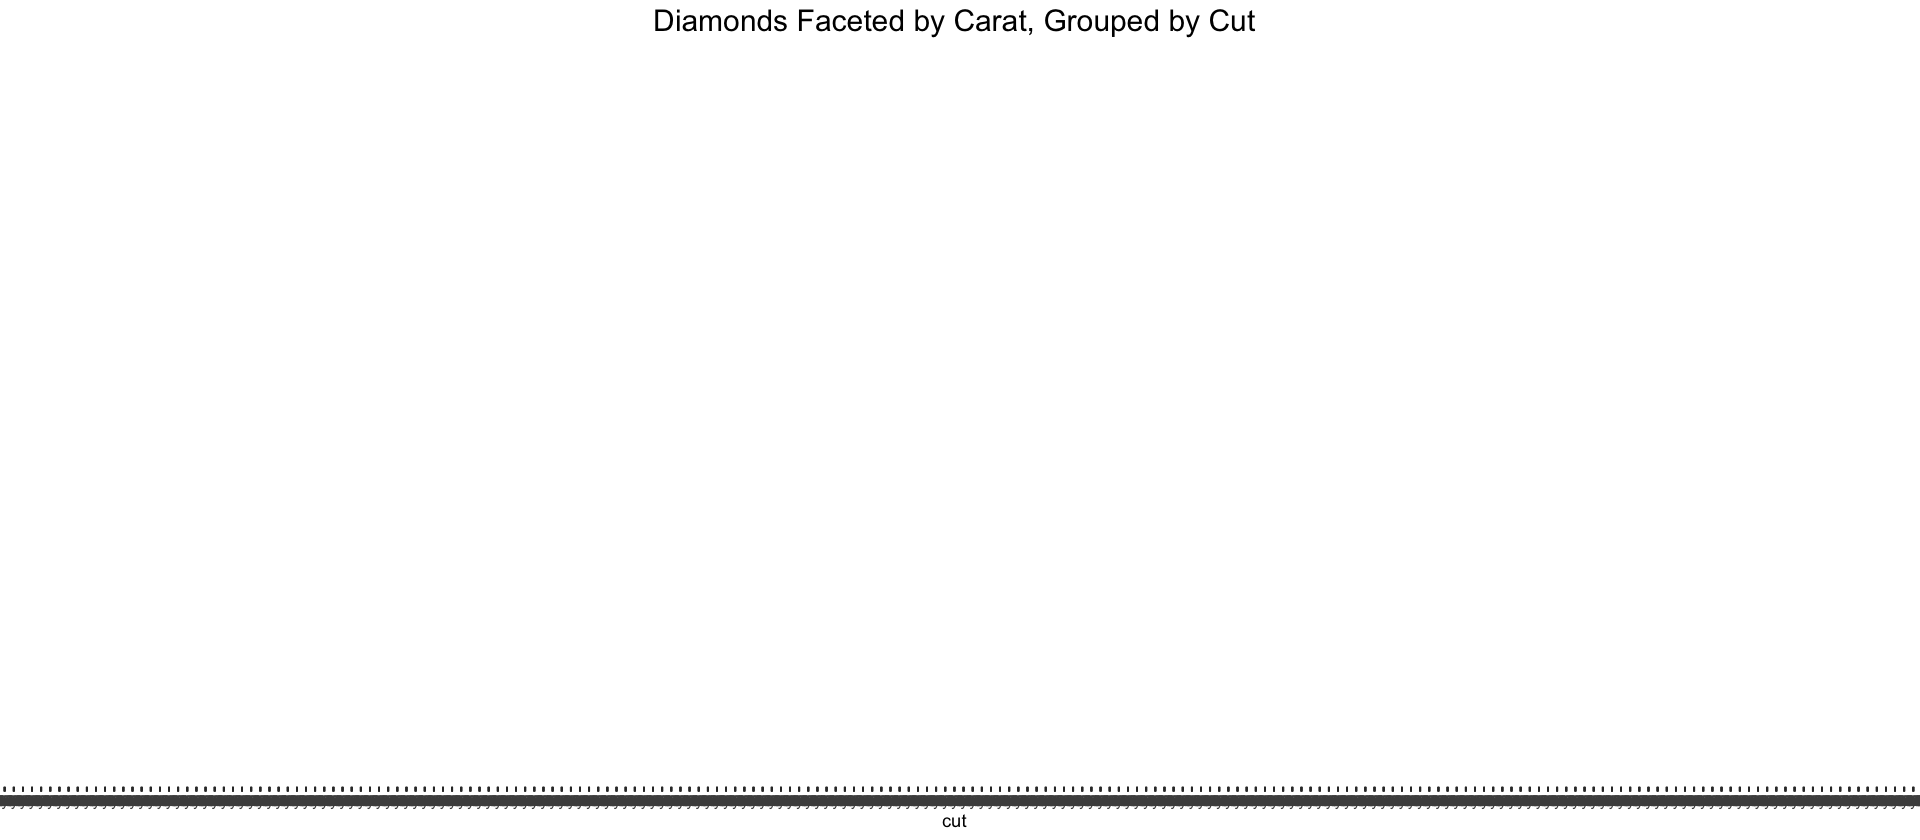

In [64]:
# Set global options
options(repr.plot.width=16, repr.plot.height=7)
global_size = 14

# Create plot
p1 <- qplot(cut, price, data = diamonds, colour = carat)

p1 + facet_wrap( ~ carat, nrow = 1) + 
theme_bw() + 
theme(plot.title = element_text(size = 18, hjust = 0.5)) +
ggtitle("Diamonds Faceted by Carat, Grouped by Cut")

### D. Which Do You Prefer?

I prefer the output from B, which is faceted by cut and grouped by carat. It does not make much sense to facet on a continuous variable (as in C.) as the number of subplots hereby becomes too big.